In [1]:
# Set python libraries to dynamically reload so that we can edit
# the external text file while calling the function in the notebook
# without having to restart the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import scipy.stats as stats


from functions import *
import seaborn as sns

In [3]:
sql_match = """
            SELECT Match.id, 
                    Country.name AS country_name, 
                    League.name AS league_name, 
                    season, 
                    stage, 
                    date,
                    HT.team_long_name AS  home_team,
                    AT.team_long_name AS away_team,
                    home_team_goal, 
                    away_team_goal                                        
            FROM Match
            JOIN Country on Country.id = Match.country_id
            JOIN League on League.id = Match.league_id
            LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
            LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
            ORDER by date
        ;"""
df_matches = make_sql_frame(sql_match)
df_matches.head()


,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0


In [4]:
df_matches = add_results(df_matches)
df_matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,HomeWin,AwayWin,Draw
0,24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,0,1,0
1,24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,1,0,0
2,24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,0,1,0
3,24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,0,1,0
4,24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,1,0,0


In [5]:
df_england = df_matches.loc[df_matches['country_name'] == "England"]
df_england_wins = calc_wins(df_england)

In [6]:
df_results = calc_wins(df_matches)
print(df_results.shape)
df_results.head()

(296, 14)


,TeamName,HomeWin,HomeLoss,HomeDraw,HomeWinPct,AwayLoss,AwayWin,AwayDraw,AwayWinPct,TotalWins,TotalLosses,TotalDraws,GamesPlayed,TotalWinPct
0,1. FC Kaiserslautern,8,15,11,0.235294,18,9,7,0.264706,17,33,18,68,0.250000
1,1. FC Köln,32,39,31,0.313725,51,28,23,0.274510,60,90,54,204,0.294118
2,1. FC Nürnberg,30,34,21,0.352941,44,19,22,0.223529,49,78,43,170,0.288235
3,1. FSV Mainz 05,55,35,29,0.462185,50,33,36,0.277311,88,85,65,238,0.369748
4,AC Ajaccio,16,22,19,0.280702,30,6,21,0.105263,22,52,40,114,0.192982


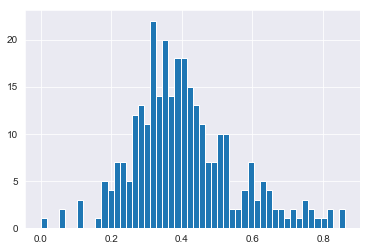

In [7]:
sns.set_style('darkgrid')
plt.hist(df_results['HomeWinPct'], bins =50)
plt.show()

In [8]:
print("mean: ",df_results.HomeWinPct.mean())
print("std_dev: ", df_results.HomeWinPct.std())

mean:  0.40447319463900916
std_dev:  0.14725297648754762


In [9]:
print("mean: ",df_results.AwayWinPct.mean())
print("std_dev: ", df_results.AwayWinPct.std())

mean:  0.24766740850614755
std_dev:  0.12422144752943907


In [10]:
print("mean: ",df_results.TotalWinPct.mean())
print("std_dev: ", df_results.TotalWinPct.std())

mean:  0.3260734133148184
std_dev:  0.1277950386885357


In [11]:
match_sample = [sample_mean(df_results['HomeWinPct'], 50) for i in range(20000)]

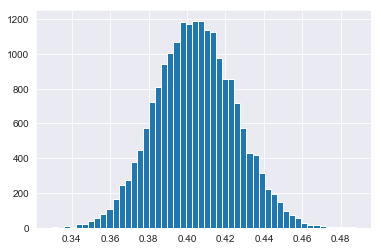

In [12]:
plt.hist(match_sample, bins = 50)
plt.show()

In [39]:
stats.t.interval(alpha = .95,
                df = len(match_sample) - 1,
                loc = np.mean(match_sample),
                scale = np.std(match_sample))
pop_mean = np.mean(match_sample)

In [14]:
print("Population Mean: ", df_results.HomeWinPct.mean())
print("Sample Mean: ", pop_mean)
acc = 1 - (np.abs(np.mean(match_sample) - df_results.HomeWinPct.mean()) / df_results.HomeWinPct.mean())
print("Accuracy: ", np.round(acc*100,2))

Population Mean:  0.40447319463900916
Sample Mean:  0.40438502432946427
Accuracy:  99.98


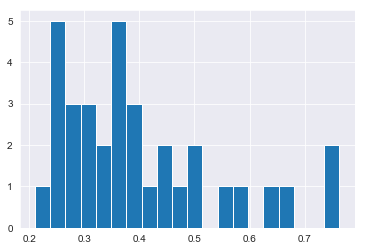

In [15]:
sns.set_style('darkgrid')
plt.hist(df_england_wins['HomeWinPct'], bins =20)
plt.show()

In [16]:
print("mean: ",df_england_wins.HomeWinPct.mean())
print("std_dev: ", df_england_wins.HomeWinPct.std())

mean:  0.40140793159369015
std_dev:  0.1443135799958331


In [17]:
print("mean: ",df_england_wins.AwayWinPct.mean())
print("std_dev: ", df_england_wins.AwayWinPct.std())

mean:  0.25062840925844015
std_dev:  0.12021839338057327


In [18]:
print("mean: ",df_england_wins.TotalWinPct.mean())
print("std_dev: ", df_england_wins.TotalWinPct.std())

mean:  0.3260181704260652
std_dev:  0.1260754941980799


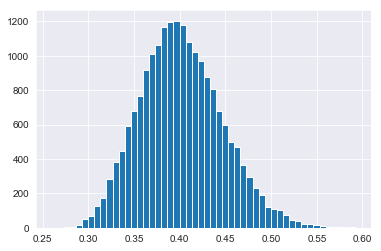

In [19]:
england_sample = [sample_mean(df_england_wins['HomeWinPct'], 10) for i in range(20000)]
plt.hist(england_sample, bins=50)
plt.show()

In [20]:
print("Population Mean: ", df_england_wins.HomeWinPct.mean())
print("Sample Mean: ", np.mean(england_sample))
acc_2 = 1 - (np.abs(np.mean(england_sample) - df_england_wins.HomeWinPct.mean()) / df_england_wins.HomeWinPct.mean())
print("Accuracy: ", np.round(acc_2*100,2))

Population Mean:  0.40140793159369015
Sample Mean:  0.4015654000626566
Accuracy:  99.96


In [36]:
#t-test
#t critical value for 5% alpha
t_crit_ = np.round(stats.t.ppf(1 - 0.05, df =295),3)
t_crit_

1.65

In [22]:
t_value = (np.mean(england_sample) - np.mean(match_sample))/(np.std(england_sample) / np.sqrt(df_england_wins.shape[0]))
t_value

-0.3643073781984207

In [40]:
t_value_ = stats.ttest_1samp(a = england_sample, popmean = df_results.HomeWinPct.mean())
t_value_

Ttest_1sampResult(statistic=-9.111819985614952, pvalue=8.84627190777052e-20)

In [42]:
sql_league = """
            SELECT L.name as LeagueName,
            C.name as CountryName
            FROM League as L
            JOIN Country as C
            ON C.id = L.country_id
            ;"""
df_league = make_sql_frame(sql_league)
df_league.head()

,LeagueName,CountryName
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy


In [26]:
countries = df_league.CountryName.tolist()
countries

['Belgium',
 'England',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Poland',
 'Portugal',
 'Scotland',
 'Spain',
 'Switzerland']

In [27]:
leagues = df_league.LeagueName.tolist()
leagues

['Belgium Jupiler League',
 'England Premier League',
 'France Ligue 1',
 'Germany 1. Bundesliga',
 'Italy Serie A',
 'Netherlands Eredivisie',
 'Poland Ekstraklasa',
 'Portugal Liga ZON Sagres',
 'Scotland Premier League',
 'Spain LIGA BBVA',
 'Switzerland Super League']

In [28]:
list_of_countries = []
for i in range(0,len(countries)):
    country_dict = {}
    country_dict['Name'] = countries[i]
    country_dict['League'] = leagues[i]
    list_of_countries.append(country_dict)

In [29]:
for i in range(0,len(list_of_countries)):
    df = df_matches.loc[df_matches.country_name == list_of_countries[i]["Name"]]
    df_wins = calc_wins(df)
    list_of_countries[i]['TeamNames'] = df_wins.TeamName.tolist()
    list_of_countries[i]['HomeWinPct'] = df_wins.HomeWinPct.tolist()
    list_of_countries[i]['AwayWinPct'] = df_wins.AwayWinPct.tolist()
    list_of_countries[i]['TotalWinPct'] = df_wins.TotalWinPct.tolist()


Belgium
Fail to reject the NULL
England
Fail to reject the NULL
France
Fail to reject the NULL
Germany
Fail to reject the NULL
Italy
Fail to reject the NULL
Netherlands
Fail to reject the NULL
Poland
Fail to reject the NULL
Portugal
Fail to reject the NULL
Scotland
Fail to reject the NULL
Spain
Fail to reject the NULL
Switzerland
Fail to reject the NULL


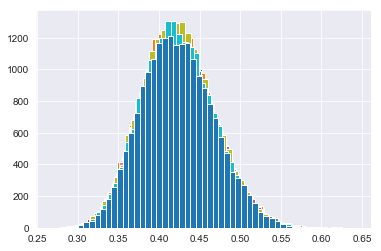

In [41]:
for i in range(0,len(list_of_countries)):
    team_home_win = list_of_countries[i]['HomeWinPct']
    sample_size = len(team_home_win)
    team_sample = [sample_mean(belgian_home_win, 10) for i in range(20000)]
    print(list_of_countries[i]['Name'])
    t_crit_ = np.round(stats.t.ppf(1 - 0.05, df = sample_size -1),3)
    t_value = (np.mean(team_home_win) - np.mean(match_sample))/(np.std(belgian_home_win) / np.sqrt(sample_size))
    if(t_value > t_crit_):
        print("reject the NULL")
    else:
        print("Fail to reject the NULL")
    plt.hist(team_sample, bins =50)
plt.show()

In [32]:
belgian_home_win = list_of_countries[0]['HomeWinPct']

In [33]:
len(belgian_home_win)

24

In [38]:
list_of_countries[0]["Name"]

'Belgium'

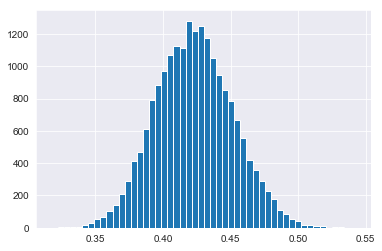

In [34]:
belgian_sample = [sample_mean(belgian_home_win, 24) for i in range(20000)]
plt.hist(belgian_sample, bins=50)
plt.show()

In [21]:
#t-test
#t critical value for 5% alpha

t_crit_ = np.round(stats.t.ppf(1 - 0.05, df = sample_size -1),3)
t_crit_

1.692

In [35]:
t_value = (np.mean(belgian_home_win) - np.mean(match_sample))/(np.std(belgian_home_win) / np.sqrt(len(belgian_home_win)))
t_value

0.6533301789674414